<a href="https://colab.research.google.com/github/gavinlampton/CECS456-Group7_final-project/blob/jason-branch/1-Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (Part 1)

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
file_contents = pd.read_excel('./Real estate valuation data set.xlsx')
file_contents = file_contents.drop('No', axis=1)
file_contents.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


(414, 7)


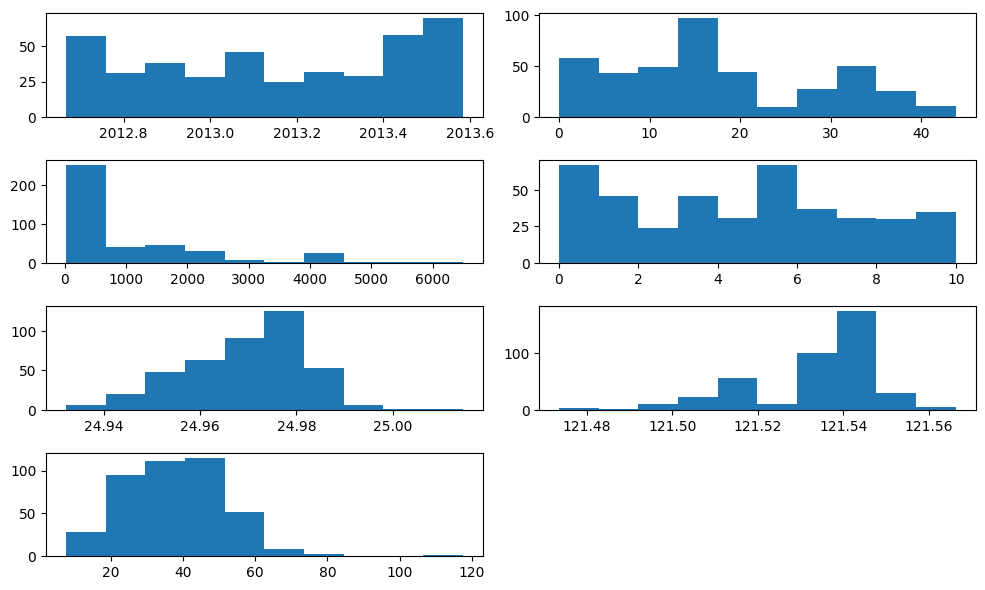

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 6))
fig.tight_layout(pad=1.0)
 
col = 0
print(file_contents.shape)
for index, column in enumerate(file_contents):
  ax[index//2, col].hist(file_contents[column])
  if col == 1:
    col = 0
  else:
    col += 1

fig.delaxes(ax[3, 1])
plt.show()

(414, 7)


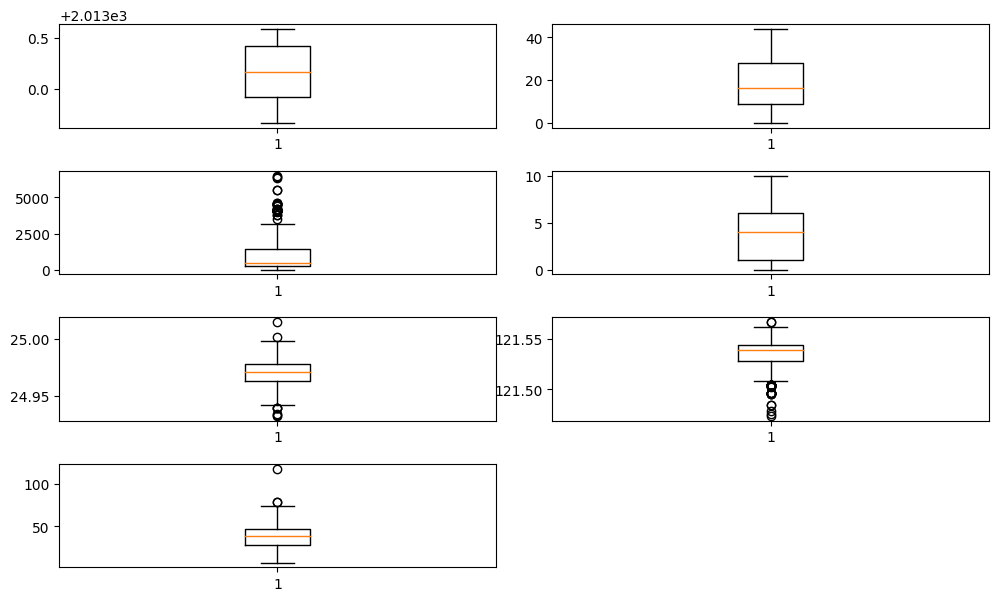

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 6))
fig.tight_layout(pad=1.0)
 
col = 0
print(file_contents.shape)
for index, column in enumerate(file_contents):
  ax[index//2, col].boxplot(file_contents[column])
  if col == 1:
    col = 0
  else:
    col += 1

fig.delaxes(ax[3, 1])
plt.show()

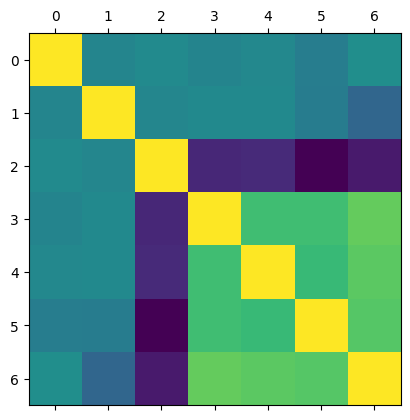

In [19]:
plt.matshow(file_contents.corr())
plt.show()

Principle Component Analysis (Part 2)

In [45]:
from sklearn.model_selection import train_test_split

X = file_contents.iloc[:, :-1].values
y = file_contents.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#going to redo this with a better process to find right k 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

k = 0
highest_r2 = 0
X_best_train = []
X_best_test = []
for i in range(2, len(X_train[0])):
  pca = PCA(n_components = i) 
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  regressor = LinearRegression()
  regressor.fit(X_train_pca, y_train)
  y_pred = regressor.predict(X_test_pca)

  r2 = r2_score(y_test, y_pred)
  if r2 > highest_r2: 
    highest_r2 = r2
    X_best_train = X_train_pca
    X_best_test = X_test_pca
    k = i

print(k, highest_r2)
X_train = X_best_train
X_test = X_best_test

0.551563700777032 0 2
0.6220020641124389 2 3
0.6350192411320996 3 4
0.6443564582147316 4 5
5 0.6443564582147316


0.551563700777032